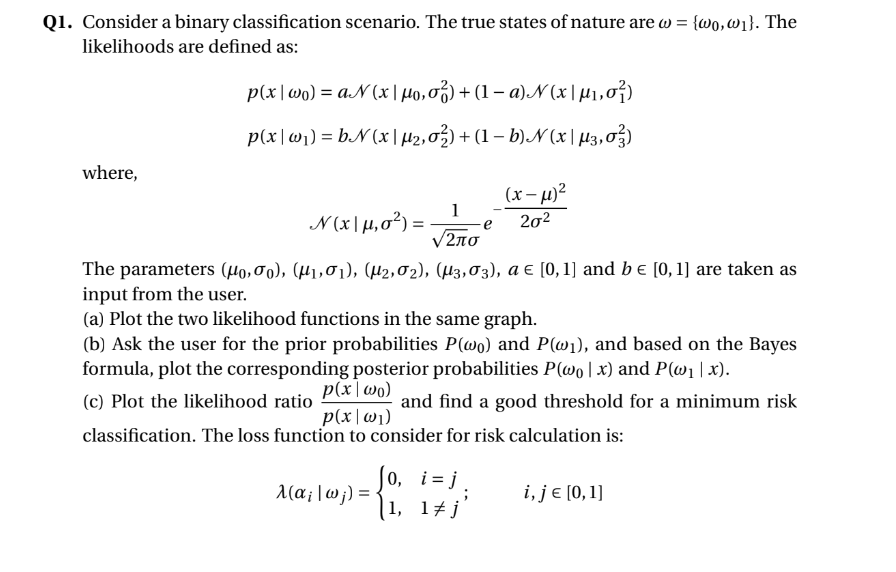

**Part (a)**

Enter parameters for class ω0
Enter μ0: 2
Enter σ0: 1
Enter μ1: 4
Enter σ1: 2
Enter mixing coefficient a (0–1): 0.5

Enter parameters for class ω1
Enter μ2: 4
Enter σ2: 4
Enter μ3: 7
Enter σ3: 3
Enter mixing coefficient b (0–1): 0.5


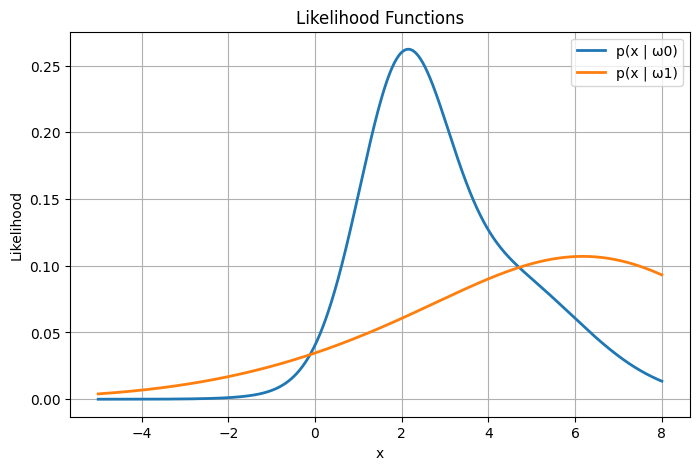

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# inputs by user

print("Enter parameters for class ω0")
mu0 = float(input("Enter μ0: "))
sigma0 = float(input("Enter σ0: "))
mu1 = float(input("Enter μ1: "))
sigma1 = float(input("Enter σ1: "))
a = float(input("Enter mixing coefficient a (0–1): "))

print("\nEnter parameters for class ω1")
mu2 = float(input("Enter μ2: "))
sigma2 = float(input("Enter σ2: "))
mu3 = float(input("Enter μ3: "))
sigma3 = float(input("Enter σ3: "))
b = float(input("Enter mixing coefficient b (0–1): "))

# Range of x

x = np.linspace(-5, 8, 1000)


# Likelihood functions defining

p_w0 = a * norm.pdf(x, mu0, sigma0) + (1 - a) * norm.pdf(x, mu1, sigma1)
p_w1 = b * norm.pdf(x, mu2, sigma2) + (1 - b) * norm.pdf(x, mu3, sigma3)


# PLOT

plt.figure(figsize=(8,5))
plt.plot(x, p_w0, label="p(x | ω0)", linewidth=2)
plt.plot(x, p_w1, label="p(x | ω1)", linewidth=2)
plt.xlabel("x")
plt.ylabel("Likelihood")
plt.title("Likelihood Functions")
plt.legend()
plt.grid()
plt.show()



**Part (b)**

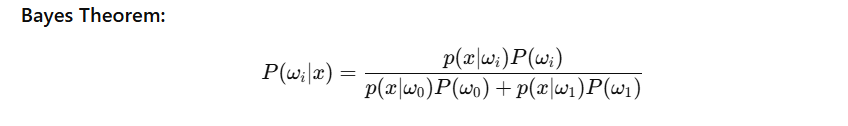

Enter prior probability P(w0): 0.6
Enter prior probability P(w1): 0.4


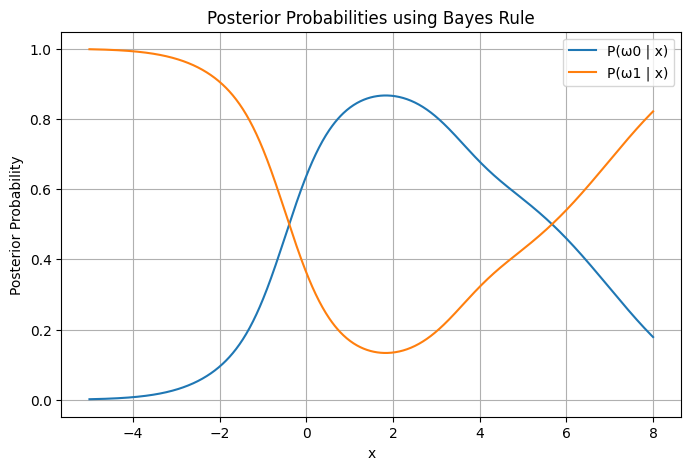

In [12]:
# Posterior Probabilities

P_w0 = float(input("Enter prior probability P(w0): "))
P_w1 = float(input("Enter prior probability P(w1): "))

if abs(P_w0 + P_w1 - 1) > 1e-6:
    print("⚠ Warning: Priors should sum to 1  that means w0 + w1 = 1 must satisfy ")

posterior_w0 = (p_w0 * P_w0) / (p_w0 * P_w0 + p_w1 * P_w1)
posterior_w1 = (p_w1 * P_w1) / (p_w0 * P_w0 + p_w1 * P_w1)

# Plot posterior probabilities
plt.figure(figsize=(8,5))
plt.plot(x, posterior_w0, label="P(ω0 | x)")
plt.plot(x, posterior_w1, label="P(ω1 | x)")
plt.title("Posterior Probabilities using Bayes Rule")
plt.xlabel("x")
plt.ylabel("Posterior Probability")
plt.legend()
plt.grid()
plt.show()


**Part (c)**


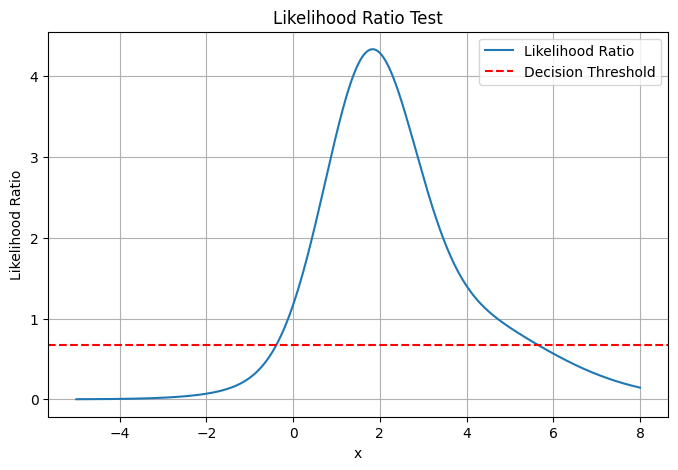


Decision Rule:
If p(x|ω0)/p(x|ω1) > P(ω1)/P(ω0) → Decide ω0
Else → Decide ω1


In [13]:

likelihood_ratio = p_w0 / p_w1
threshold = P_w1 / P_w0   #  // // since loss = 0-1

plt.figure(figsize=(8,5))
plt.plot(x, likelihood_ratio, label="Likelihood Ratio")
plt.axhline(y=threshold, color='r', linestyle='--', label="Decision Threshold")
plt.xlabel("x")
plt.ylabel("Likelihood Ratio")
plt.title("Likelihood Ratio Test")
plt.legend()
plt.grid()
plt.show()

print("\nDecision Rule:")
print("If p(x|ω0)/p(x|ω1) > P(ω1)/P(ω0) → Decide ω0")
print("Else → Decide ω1")

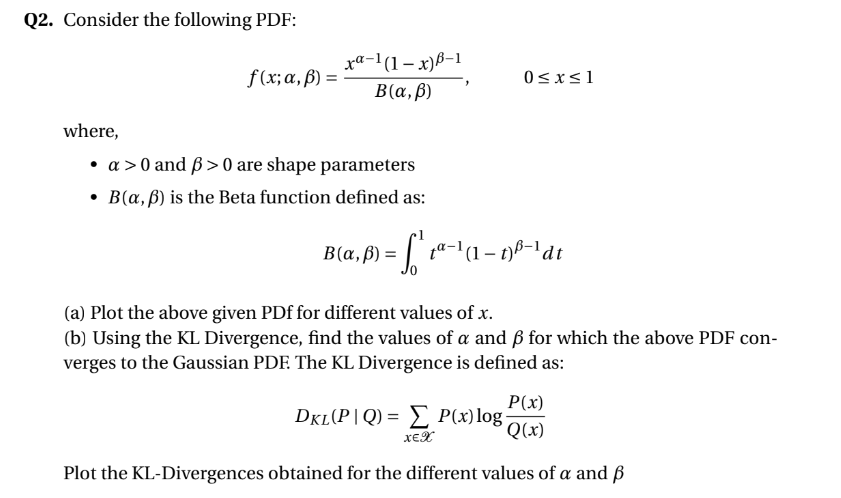

**Part (a)**

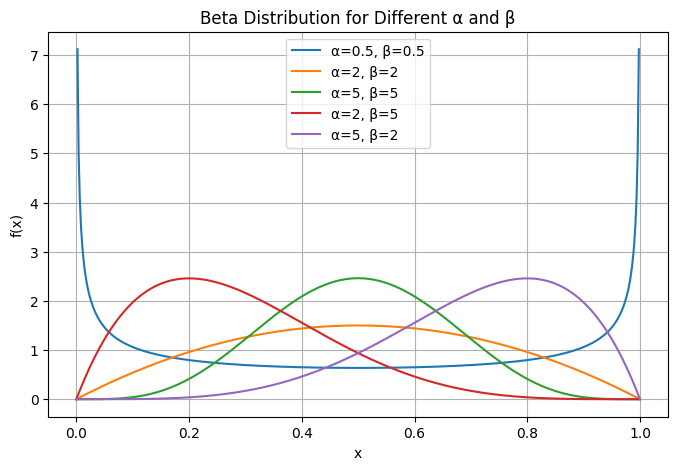

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

x = np.linspace(0, 1, 500)

params = [(0.5, 0.5), (2, 2), (5, 5), (2, 5), (5, 2)]

plt.figure(figsize=(8,5))

for a, b in params:
    plt.plot(x, beta.pdf(x, a, b), label=f"α={a}, β={b}")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Beta Distribution for Different α and β")
plt.legend()
plt.grid()
plt.show()


**Part (b)**

KL Dirversion formulla
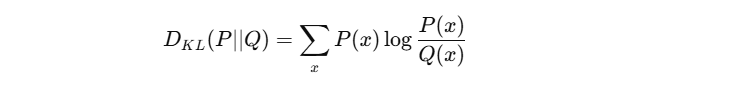

α = β	KL Divergence
1	175.484209
2	46.216656
5	7.491670
10	1.875982
20	0.469167
50	0.075074
100	0.018769


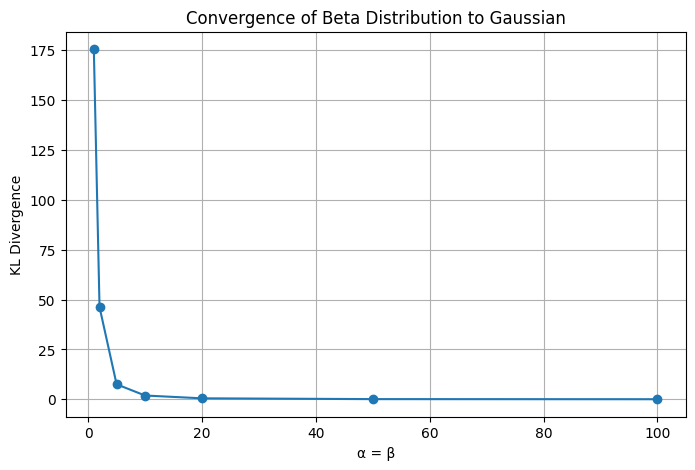

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

# Discretize x
x = np.linspace(0.001, 0.999, 1000)

# KL divergence as given in question
def KL_divergence(alpha, beta_val):
    # Beta PDF (P)
    P = beta.pdf(x, alpha, beta_val)

    # Mean and variance of Beta
    mu = alpha / (alpha + beta_val)
    var = (alpha * beta_val) / ((alpha + beta_val)**2 * (alpha + beta_val + 1))

    # Gaussian PDF (Q)
    Q = norm.pdf(x, mu, np.sqrt(var))

    # Avoid log(0)
    eps = 1e-12
    P = P + eps
    Q = Q + eps

    # KL Divergence (DISCRETE as given in question)
    KL = np.sum(P * np.log(P / Q))

    return KL


# Evaluate KL for different α = β
alpha_values = [1, 2, 5, 10, 20, 50, 100]
kl_values = []

print("α = β\tKL Divergence")
for a in alpha_values:
    kl = KL_divergence(a, a)
    kl_values.append(kl)
    print(f"{a}\t{kl:.6f}")


# Plot KL divergence

plt.figure(figsize=(8,5))
plt.plot(alpha_values, kl_values, marker='o')
plt.xlabel("α = β")
plt.ylabel("KL Divergence")
plt.title("Convergence of Beta Distribution to Gaussian")
plt.grid()
plt.show()


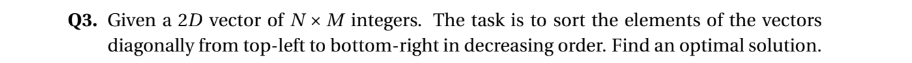

In [4]:
from collections import defaultdict

def diagonal_sort_desc(matrix):
    n, m = len(matrix), len(matrix[0])
    diag = defaultdict(list)

    # Step 1: Collect elements of each diagonal
    for i in range(n):
        for j in range(m):
            diag[i - j].append(matrix[i][j])

    # Step 2: Sort each diagonal in decreasing order
    for key in diag:
        diag[key].sort(reverse=True)

    # Step 3: Put back elements into matrix
    for i in range(n):
        for j in range(m):
            matrix[i][j] = diag[i - j].pop(0)

    return matrix


# Inputs from user
n = int(input("Enter number of rows: "))
m = int(input("Enter number of columns: "))

matrix = []
print("Enter matrix row-wise:")
for _ in range(n):
    matrix.append(list(map(int, input().split())))

print("\noriginal Matrix:")
for row in matrix:
    print(row)

sorted_matrix = diagonal_sort_desc(matrix)

print("\ndiagonal Sorted Matrix (Decreasing Order):")
for row in sorted_matrix:
    print(row)


Enter number of rows: 3
Enter number of columns: 4
Enter matrix row-wise:
1 4 5 6
4 5 6 8
2 2 2 2

Original Matrix:
[1, 4, 5, 6]
[4, 5, 6, 8]
[2, 2, 2, 2]

Diagonal Sorted Matrix (Decreasing Order):
[5, 6, 8, 6]
[4, 2, 4, 5]
[2, 2, 1, 2]


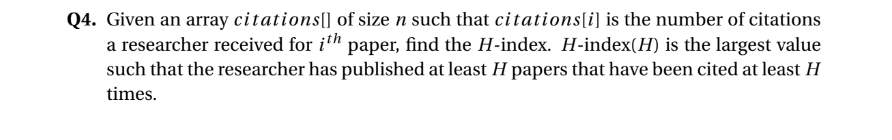

In [26]:
def h_index(citations):
    n = len(citations)

    # Step 1: Create count array
    count = [0] * (n + 1)

    # Step 2: Count citations
    for c in citations:
        if c >= n:
            count[n] += 1
        else:
            count[c] += 1

    # Step 3: Find H-index
    total = 0
    for h in range(n, -1, -1):
        total += count[h]
        if total >= h:
            return h

    return 0


# USER INPUT

n = int(input("Enter number of papers: "))
citations = list(map(int, input("Enter citations: ").split()))

# Compute H-index
result = h_index(citations)

print("\nH-index =", result)


Enter number of papers: 5
Enter citations: 4 5 6 8 9 2 4 

H-index = 4
